In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dfFull = pd.read_csv('../Datasets/auto-mpg.csv', delim_whitespace=True)
dfFull.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
dfFull.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [3]:
df = dfFull.iloc[:, 0:8] #removing the car names because its irrelevant
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 24.9+ KB


In [4]:
df = df[df.horsepower != '?'] #there are 6 missing values for horsepower so remove those cars
df.horsepower = df.horsepower.astype('float') #set horsepower from object to float

In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,23.459847,5.465473,194.124041,104.404092,2976.237852,15.550384,75.994885,1.578005
std,7.810128,1.703152,104.622462,38.518732,850.071941,2.756557,3.675975,0.806020
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2224.500000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,264.500000,125.000000,3616.500000,17.050000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777643     -0.804899   -0.778165 -0.832065   
cylinders    -0.777643   1.000000      0.950824    0.843315  0.898146   
displacement -0.804899   0.950824      1.000000    0.897265  0.933129   
horsepower   -0.778165   0.843315      0.897265    1.000000  0.864397   
weight       -0.832065   0.898146      0.933129    0.864397  1.000000   
acceleration  0.422188  -0.502281     -0.542209   -0.688857 -0.415883   
model year    0.579960  -0.341595     -0.367163   -0.415239 -0.307733   
origin        0.564652  -0.568186     -0.613875   -0.454509 -0.584540   

              acceleration  model year    origin  
mpg               0.422188    0.579960  0.564652  
cylinders        -0.502281   -0.341595 -0.568186  
displacement     -0.542209   -0.367163 -0.613875  
horsepower       -0.688857   -0.415239 -0.454509  
weight           -0.415883   -0.307733 -0.584540  
acceleration      1.000000    0.2865

<AxesSubplot: >

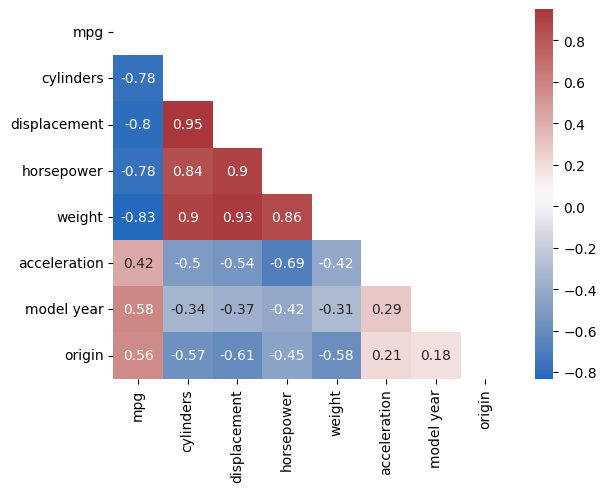

In [9]:
corr = df.corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='vlag', mask=np.triu(corr)) #creates a correlation heat map with dark red and blue as strong positive and negative

In [14]:
X = df.iloc[:, 1:]   # all the features
y = df.iloc[:, :1]   # all the mpg's

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
rgr = ExtraTreesRegressor()

In [17]:
rgr.fit(X_train, y_train)     # training the regressor model

C:\Users\kmccabewild\AppData\Local\Temp\ipykernel_17684\713707761.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rgr.fit(X_train, y_train)


ExtraTreesRegressor()

In [18]:
pred = rgr.predict(X_test)    # Predicting the mpg's for the set data and features

In [22]:
from sklearn.metrics import r2_score     # Checking the accuracy of the predictions
r2 = r2_score(pred, y_test)
print('The accuracy of this regressor model is:', r2)

The accuracy of this regressor model is: 0.8678222366349306
